## Bitcoin et Timeseries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col = 'Date', parse_dates = True)

In [6]:
bitcoin.head()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2011-10-04  3.700  3.821  3.746  3.750      3.750    1357
2011-10-05  3.750  3.820  3.650  3.676      3.676    3349
2011-10-06  3.676  3.743  3.450  3.550      3.550    6642
2011-10-07  3.550  3.590  2.900  3.293      3.293    7135
2011-10-08  3.293  3.283  2.872  2.890      2.890    2007

<Axes: xlabel='Date'>

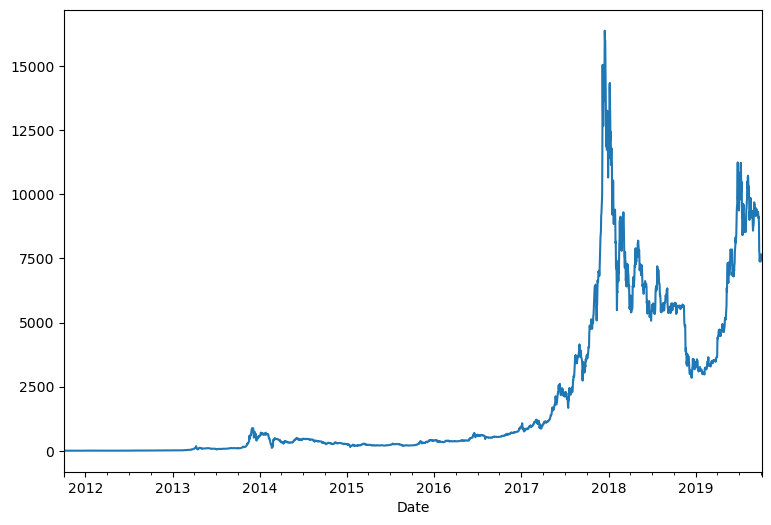

In [7]:
bitcoin['Close'].plot(figsize = (9,6))

In [8]:
bitcoin.index

DatetimeIndex(['2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07',
               '2011-10-08', '2011-10-09', '2011-10-10', '2011-10-11',
               '2011-10-12', '2011-10-13',
               ...
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', name='Date', length=2923, freq=None)

<Axes: xlabel='Date'>

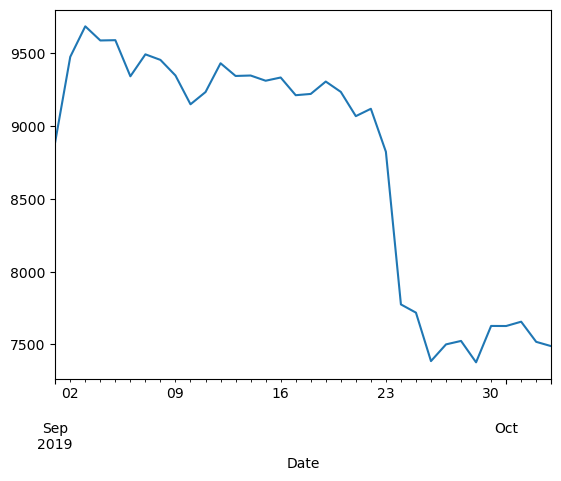

In [9]:
bitcoin['2019-09':]['Close'].plot()

<Axes: xlabel='Date'>

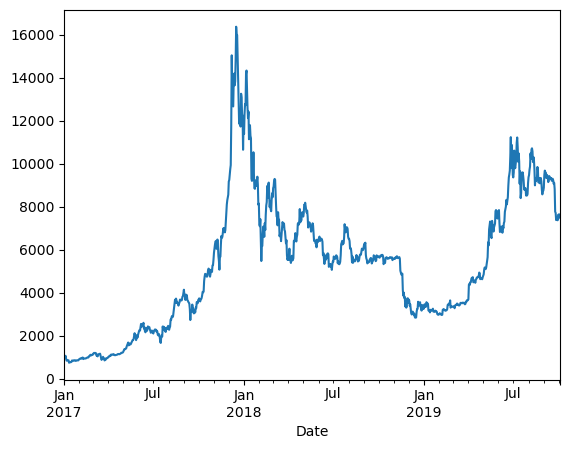

In [10]:
bitcoin['2017':'2019']['Close'].plot()

## Fonction resample

<Axes: xlabel='Date'>

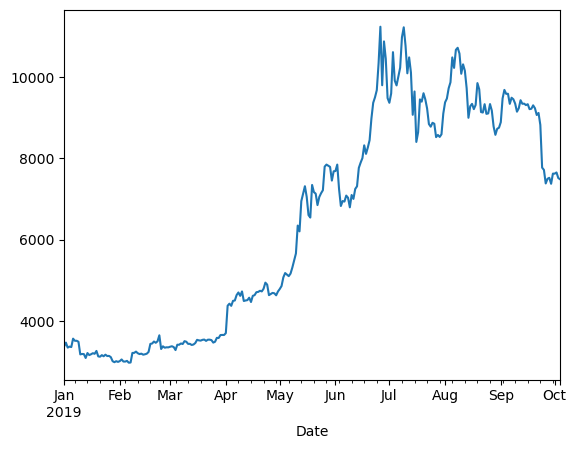

In [11]:
bitcoin.loc['2019']['Close'].plot()

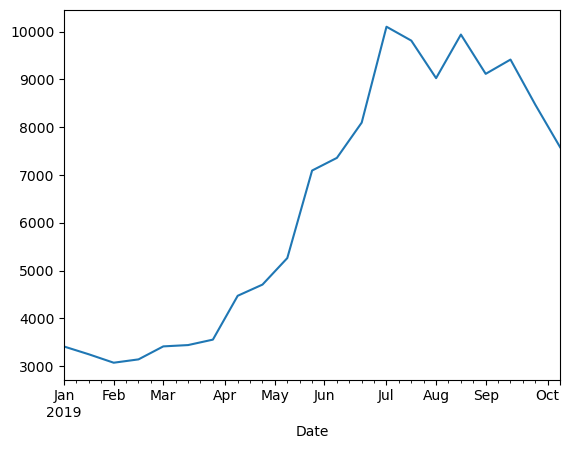

In [12]:
bitcoin.loc['2019','Close'].resample('2W').mean().plot()
plt.show()

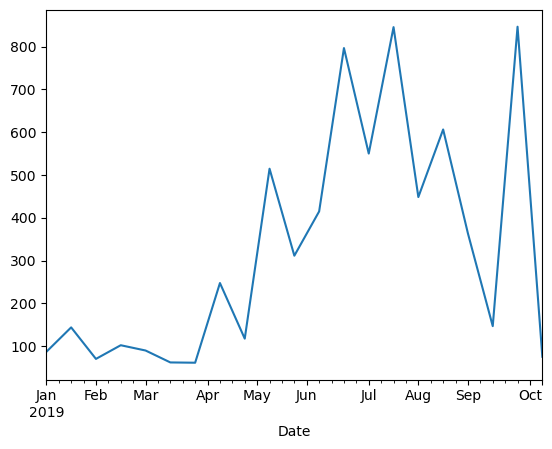

In [13]:
bitcoin.loc['2019','Close'].resample('2W').std().plot()
plt.show()

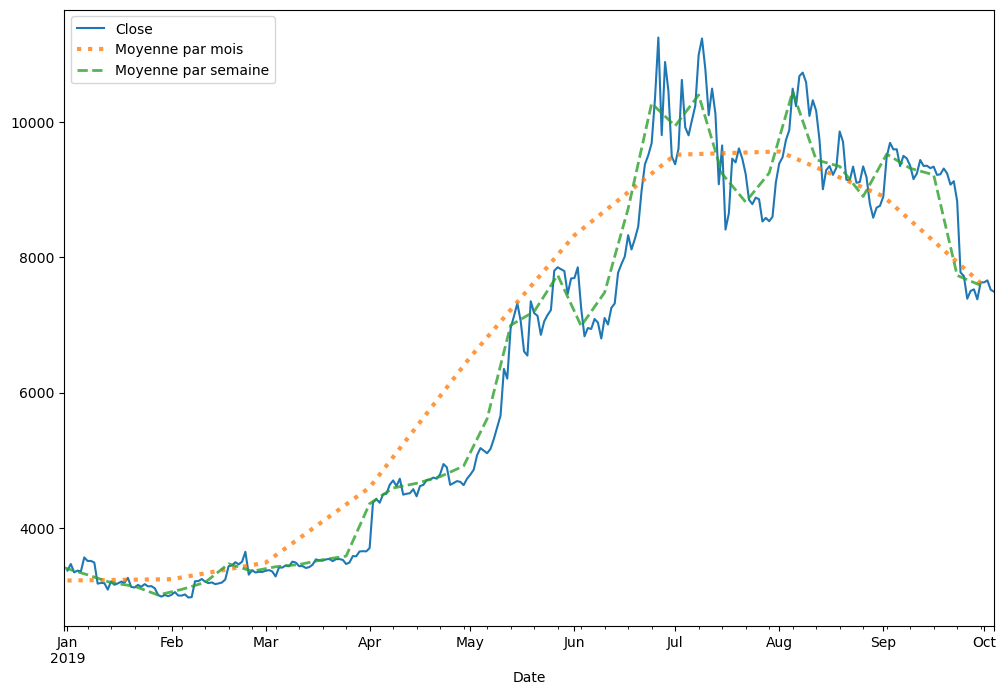

In [14]:
plt.figure(figsize = (12,8))
bitcoin.loc['2019','Close'].plot()
bitcoin.loc['2019','Close'].resample('M').mean().plot(label = 'Moyenne par mois', lw = 3, ls = ':', alpha = 0.8)
bitcoin.loc['2019','Close'].resample('W').mean().plot(label = 'Moyenne par semaine', lw = 2,ls='--', alpha = 0.8)
plt.legend()
plt.show()

## Fonction aggregate

In [15]:
m = bitcoin.loc['2019','Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

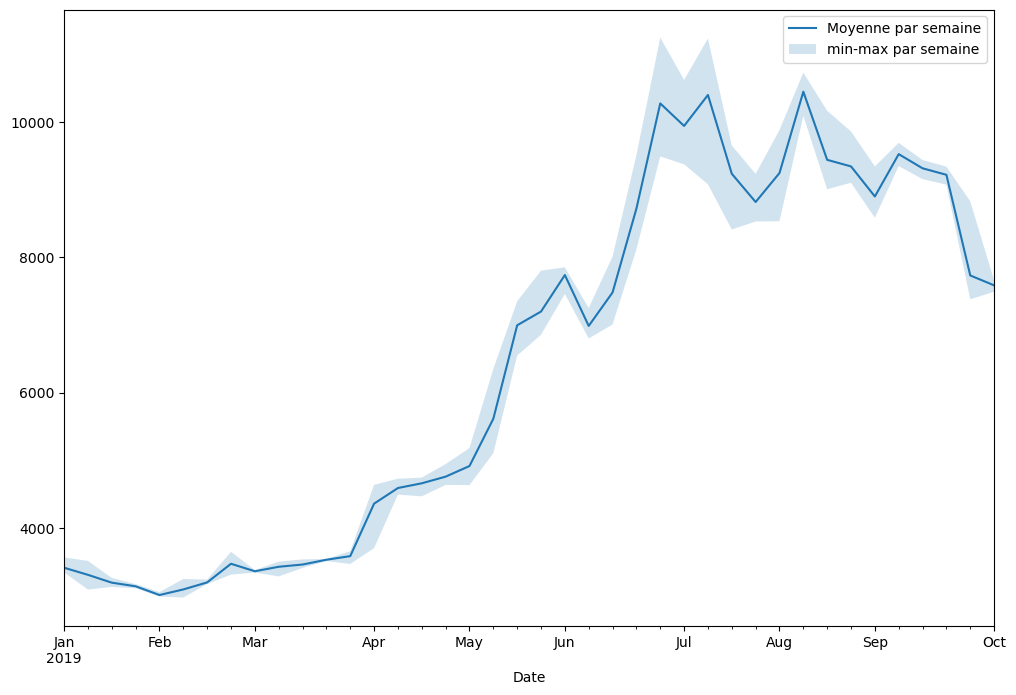

In [16]:
plt.figure(figsize = (12,8))
m['mean']['2019'].plot(label = 'Moyenne par semaine')
plt.fill_between(m.index, m['min'],m['max'], alpha = 0.2, label = 'min-max par semaine')
plt.legend()
plt.show()

## Moving average

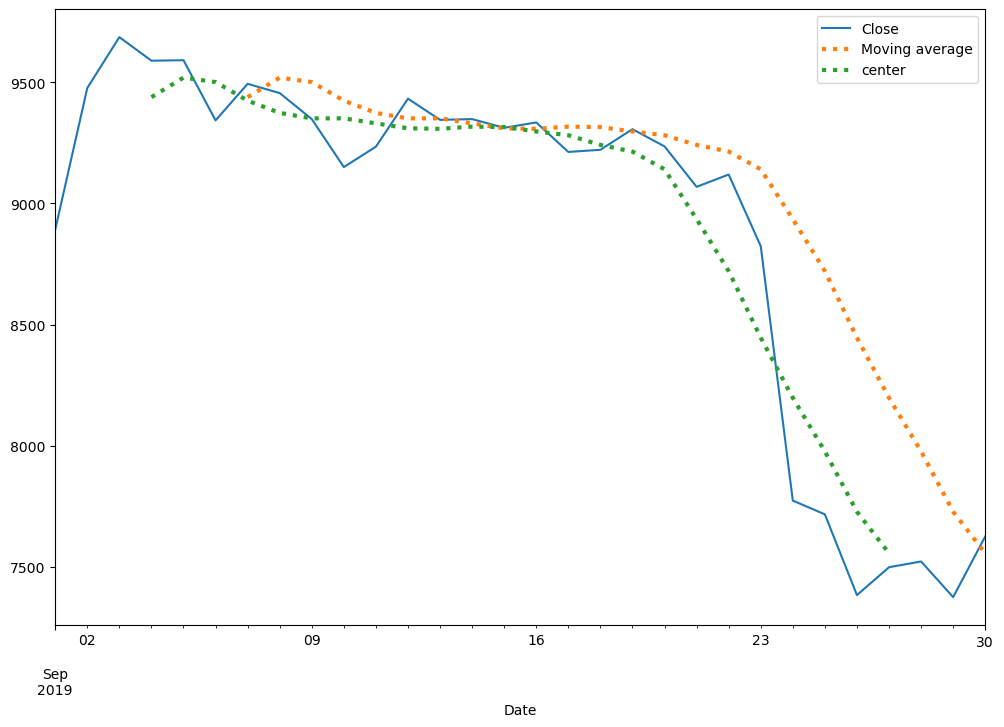

In [17]:
plt.figure(figsize = (12,8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window = 7).mean().plot(label = 'Moving average', lw = 3,ls = ':')
bitcoin.loc['2019-09', 'Close'].rolling(window = 7, center = True).mean().plot(label = 'center', lw = 3, ls = ':')
plt.legend()
plt.show()

## Exp Weighted Function

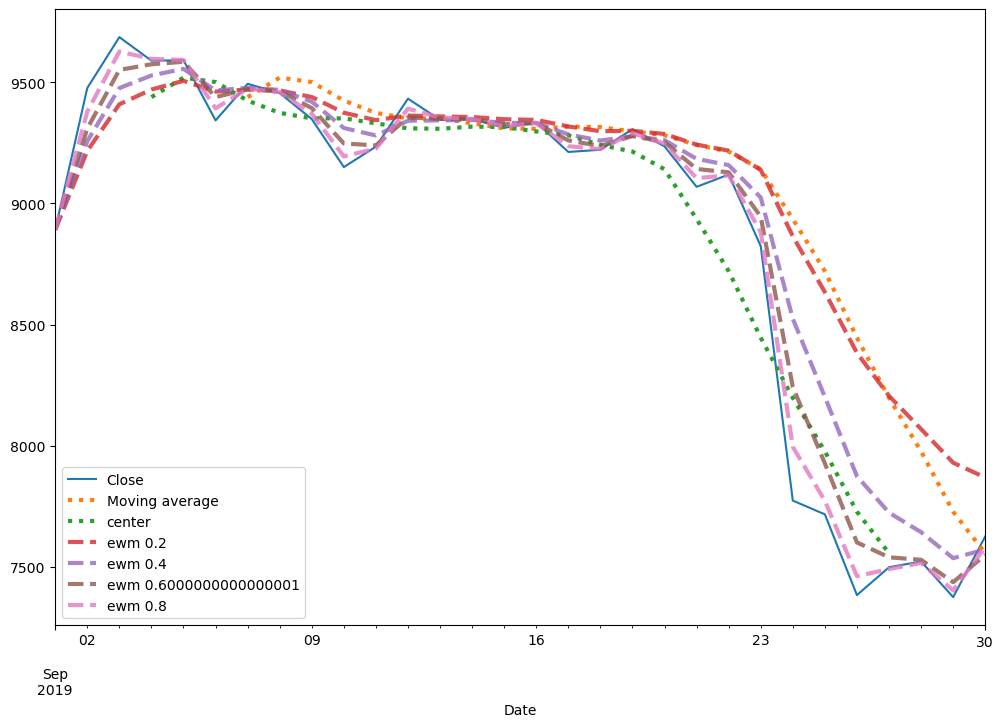

In [18]:
plt.figure(figsize = (12,8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window = 7).mean().plot(label = 'Moving average', lw = 3,ls = ':')
bitcoin.loc['2019-09', 'Close'].rolling(window = 7, center = True).mean().plot(label = 'center', lw = 3, ls = ':')
for i in np.arange(0.2,1,0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha = i).mean().plot(label = f'ewm {i}',lw = 3, ls = '--', alpha = 0.8)
plt.legend()
plt.show()

## Assembler des datasets 

In [19]:
ethereum = pd.read_csv('ETH-EUR.csv', index_col = 'Date', parse_dates = True)

In [20]:
ethereum.head()

Open    High     Low  Close  Adj Close  Volume
Date                                                       
2015-08-07  0.593  20.000  0.5930   2.56       2.56   15200
2015-08-08  2.560   2.598  0.5616   0.65       0.65   32816
2015-08-09  0.650   0.800  0.5235   0.70       0.70    4041
2015-08-10  0.700   0.750  0.5850   0.68       0.68    5645
2015-08-11  0.680   1.008  0.5915   0.95       0.95   21607

<Axes: xlabel='Date'>

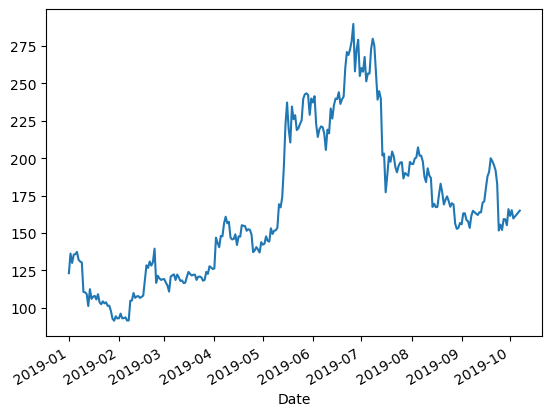

In [21]:
ethereum['2019':]['Close'].plot()

In [22]:
btc_eth = pd.merge(bitcoin, ethereum , on = 'Date', how = 'inner' ,suffixes = ('_btc', '_eth'))

In [23]:
pd.merge(bitcoin, ethereum , on = 'Date', how = 'outer' ,suffixes = ('_btc', '_eth'))

Open_btc     High_btc      Low_btc    Close_btc  Adj Close_btc  \
Date                                                                            
2011-10-04     3.700000     3.821000     3.746000     3.750000       3.750000   
2011-10-05     3.750000     3.820000     3.650000     3.676000       3.676000   
2011-10-06     3.676000     3.743000     3.450000     3.550000       3.550000   
2011-10-07     3.550000     3.590000     2.900000     3.293000       3.293000   
2011-10-08     3.293000     3.283000     2.872000     2.890000       2.890000   
...                 ...          ...          ...          ...            ...   
2019-10-01  7626.029785  7818.279785  7535.799805  7625.560059    7625.560059   
2019-10-02  7625.560059  7663.270020  7489.770020  7655.250000    7655.250000   
2019-10-03  7655.250000  7685.930176  7379.220215  7516.790039    7516.790039   
2019-10-04  7514.477051  7512.555176  7424.196289  7487.083496    7487.083496   
2019-10-07          NaN          NaN          NaN          NaN            NaN   

              Volume_btc    Open_eth    High_eth     Low_eth   Close_eth  \
Date                                                                       
2011-10-04  1.357000e+03         NaN         NaN         NaN         NaN   
2011-10-05  3.349000e+03         NaN         NaN         NaN         NaN   
2011-10-06  6.642000e+03         NaN         NaN         NaN         NaN   
2011-10-07  7.135000e+03         NaN         NaN         NaN         NaN   
2011-10-08  2.007000e+03         NaN         NaN         NaN         NaN   
...                  ...         ...         ...         ...         ...   
2019-10-01  7.564432e+07  165.910004  170.710007  159.330002  161.410004   
2019-10-02  5.187133e+07  161.410004  165.740005  159.699997  165.240005   
2019-10-03  4.943731e+07  165.240005  165.520004  154.960007  159.690002   
2019-10-04  1.221204e+10         NaN         NaN         NaN         NaN   
2019-10-07           NaN  155.179993  166.309998  153.889999  164.929993   

            Adj Close_eth  Volume_eth  
Date                                   
2011-10-04            NaN         NaN  
2011-10-05            NaN         NaN  
2011-10-06            NaN         NaN  
2011-10-07            NaN         NaN  
2011-10-08            NaN         NaN  
...                   ...         ...  
2019-10-01     161.410004  11427525.0  
2019-10-02     165.240005   5760811.0  
2019-10-03     159.690002   7711746.0  
2019-10-04            NaN         NaN  
2019-10-07     164.929993  10220110.0  

[2924 rows x 12 columns]

<Axes: xlabel='Date'>

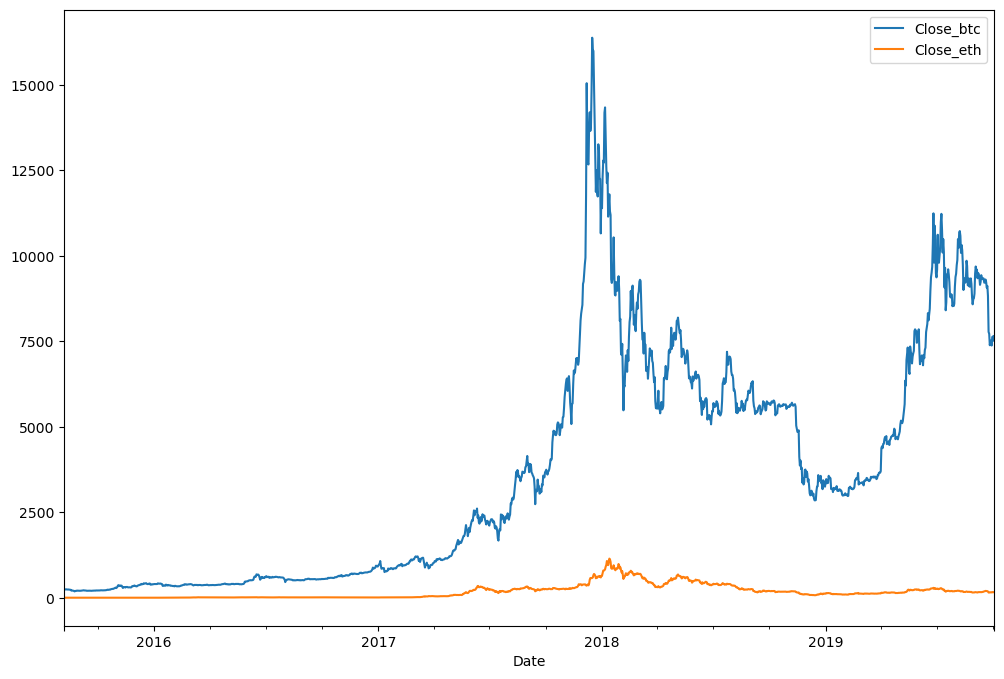

In [24]:
btc_eth[['Close_btc', 'Close_eth']].plot(figsize=(12,8))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

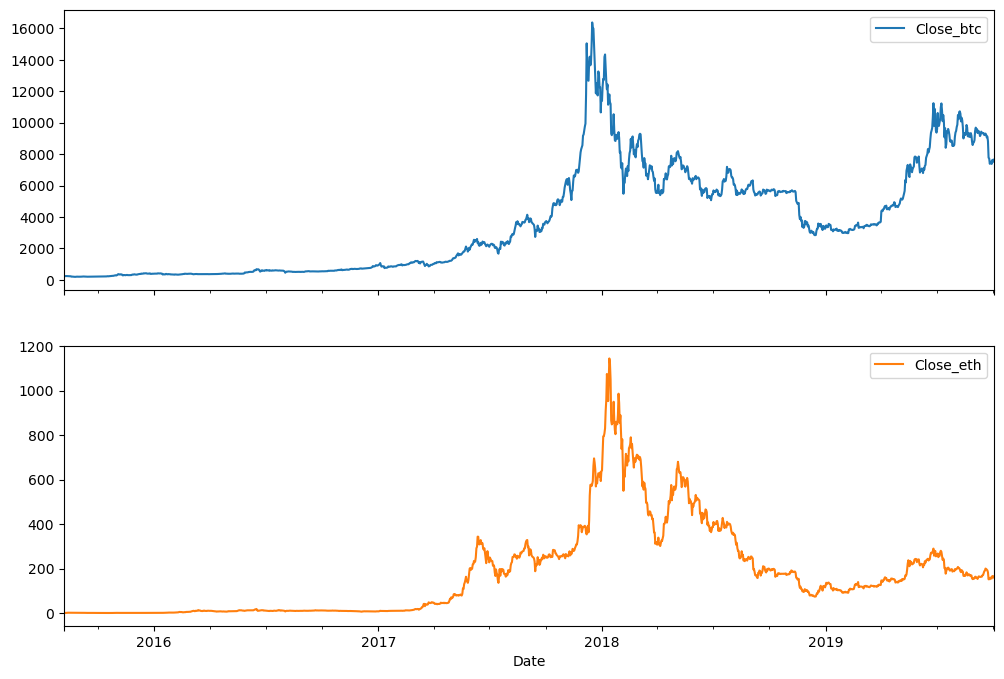

In [25]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots = True, figsize=(12,8))

In [26]:
correlation = btc_eth[['Close_btc', 'Close_eth']].corr()

<Axes: >

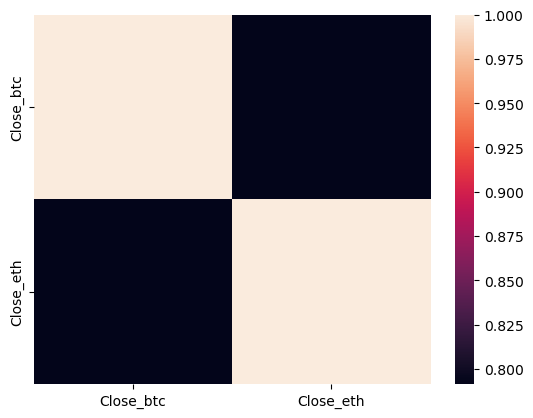

In [27]:
import seaborn as sns
sns.heatmap(correlation)

## Exercice
Comment procéder ?

1. Utiliser rolling() pour calculer :
        -max sur les 28 derniers jours et le min sur les 28 derniers jours
2. Boolean indexing :
        -Si 'Close'>max28 alors BUY = 1; Si 'Close'< min28 aloes SELL = -1
        
inice : initialiser des colonnes 'Buy' et 'Sell' avec des 0.

In [28]:
data = bitcoin.copy()
data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [29]:
data['RollingMax'] = data['Close'].shift(1).rolling(window = 28).max()
data['RollingMin'] = data['Close'].shift(1).rolling(window = 28).min()
data.loc[data['RollingMax']< data['Close'], 'Buy'] = 1
data.loc[data['RollingMin']> data['Close'], 'Sell'] = -1

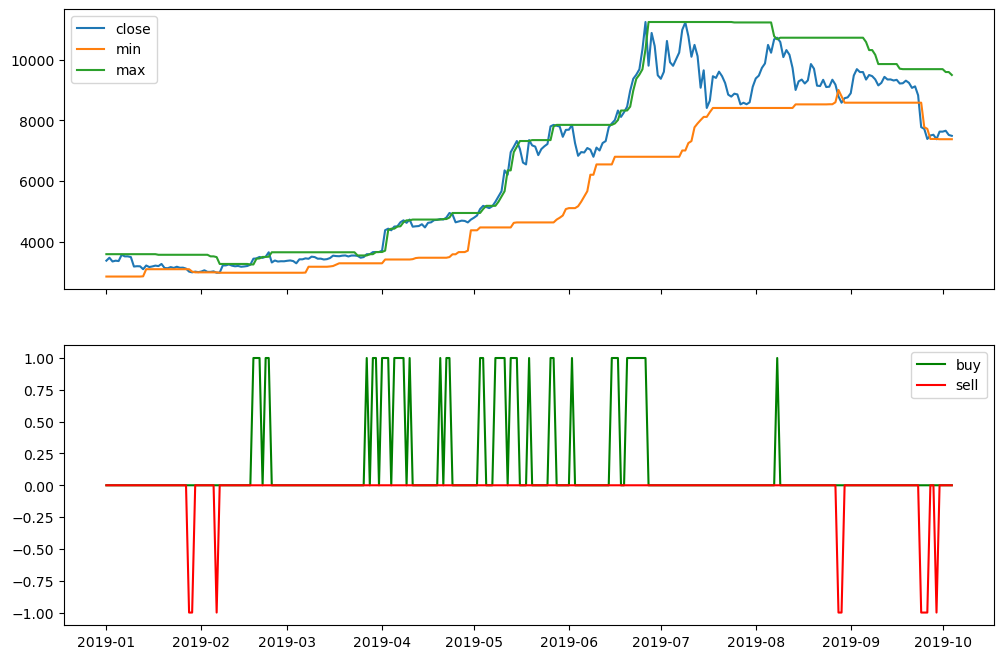

In [30]:
start = '2019'
end = '2019'
fig, ax = plt.subplots(2, figsize = (12,8), sharex = True)
#plt.figure(figsize = (12,8))
#plt.subplot(211)
ax[0].plot(data['Close'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['close', 'min' , 'max'])
ax[1].plot(data['Buy'][start:end], c = 'g')
ax[1].plot(data['Sell'][start:end], c = 'r')
ax[1].legend(['buy','sell'])